# Importing libraries

In [1]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

ModuleNotFoundError: No module named 'seaborn'

# Web Scraping

Library - BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films"
req = requests.get(url)

NameError: name 'requests' is not defined

In [ ]:
req

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of Academy Award-winning films - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ff4dadf8-ffc7-4036-baf0-417a4cd9689f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Academy_Award-winning_films","wgTitle":"List of Academy Award-winning films","wgCurRevisionId":1036755100,"wgRevisionId":1036755100,"wgArticleId":3578923,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Art

In [ ]:
Film = []
Year =[]
Award = []
Nomination = []
count = 0

for i in soup.findAll('td'):
  i = re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",str(i))
  if count == 0:
    Film.append(i)
    count += 1
  elif count == 1:
    Year.append(i)
    count += 1
  elif count == 2:
    Award.append(i)
    count += 1
  else:
    count = 0
    Nomination.append(i)

In [ ]:
len(Film)

1335

In [ ]:
len(Year)

1335

In [ ]:
len(Award)

1334

In [ ]:
len(Nomination)

1334

In [ ]:
Film[1331]

'Zorba the Greek'

In [ ]:
oscar = pd.DataFrame({"Film":Film[:1332], "Years":Year[:1332], "Awards":Award[:1332], "Nominations":Nomination[:1332]})

In [ ]:
oscar.tail(10)

,Film,Years,Awards,Nominations
1322,World Without Sun,1964,1,1
1323,Wrestling Swordfish,32,1,1
1324,Written on the Wind,1956,1,3
1325,Wuthering Heights,1939,1,8
1326,Yankee Doodle Dandy,1942,3,8
1327,The Yankee Doodle Mouse,1943,1,1
1328,The Yearling,1946,2,7
1329,"Yesterday, Today and Tomorrow",1964,1,1
1330,You Can't Take It with You,1938,2,7
1331,Zorba the Greek,1964,3,7


In [ ]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1332 non-null   object
 1   Years        1332 non-null   object
 2   Awards       1332 non-null   object
 3   Nominations  1332 non-null   object
dtypes: object(4)
memory usage: 41.8+ KB


# Project 2 - FIFA Dataset Analysis (Web Scraping)

In [ ]:
# Steps

1. Import all the libraries for Web Scraping, Data Visualisation, Analysis
2. Scrape the Data
3. Data Exploration, Data Cleaning, Data Manipulation
4. Convert it into the DataFrame
5. Perform the Analysis (EDA)

# Performing the Data Scraping from the Web

Link: https://sofifa.com/players?offset=[1-10]

In [2]:
url = f'https://sofifa.com/players?offset={i}'
req = requests.get(url)

In [3]:
# Checking the status code
req

<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 21 Aug 6, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 21 player ratings on Aug 6, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.com" rel="preconnect"/>\n  <link href="https://cdn.sofifa.com" rel="dns-prefetch"/>\n  <link href="https://pagead2.googlesyndication.com" rel="preconnect"/>\n  <link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googles

# Data Exploration, Data Cleaning, Data Manipulation

In [ ]:
columns = ['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 
           'Duration', 'Value', 'Wage', 'Total_stats', 'Hits']

In [49]:
def  fifa_datset(url):
  fifa_final = pd.DataFrame()

  for i in range(1,11):
    # url = f'https://sofifa.com/players?offset={i}'
    url = url+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(11)]

    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)
      lists[10].append(Hits)

    fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                      'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                      'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                      'Total_stats':lists[9], 'Hits':lists[10]})
    
    fifa.drop(0, inplace=True)
    
    fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['OVA'] = pd.to_numeric(fifa['OVA'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Value'] = pd.to_numeric(fifa['Value'])
    fifa['Wage'] = pd.to_numeric(fifa['Wage'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    fifa['Hits'] = pd.to_numeric(fifa['Hits'])

    fifa_final = fifa_final.append(fifa, ignore_index = True)
  
  return fifa_final

In [44]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(11)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
    Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)
    lists[10].append(Hits)

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9], 'Hits':lists[10]})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
  fifa['Hits'] = pd.to_numeric(fifa['Hits'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [51]:
fifa_600 = fifa_final
fifa_598 = fifa_datset("https://sofifa.com/players?offset=")

In [52]:
print(fifa_600.shape)
fifa_598.shape

(600, 11)


(598, 11)

In [53]:
print(fifa_600.columns)
fifa_598.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')


Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')

In [55]:
fifa_598.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [56]:
fifa_600.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [72]:
pd.concat([fifa_600,fifa_598]).drop_duplicates(keep=False)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,https://cdn.sofifa.com/players/231/240/21_120.png,Emre Mor,22,73,80,RC Celta,2017 ~ 2022,6.0,16,1759,3.7
109,https://cdn.sofifa.com/players/252/371/21_120.png,Jude Bellingham,17,76,88,Borussia Dortmund,2020 ~ 2025,17.0,6,2015,559.0
110,https://cdn.sofifa.com/players/229/558/21_120.png,Dayot Upamecano,21,81,90,RB Leipzig,2017 ~ 2023,54.0,41,1840,558.0
111,https://cdn.sofifa.com/players/222/665/21_120.png,Martin Ødegaard,21,83,89,Arsenal,"Jun 30, 2021",58.5,135,2095,542.0
112,https://cdn.sofifa.com/players/237/692/21_120.png,Phil Foden,20,83,92,Manchester City,2016 ~ 2024,79.5,115,2035,537.0
...,...,...,...,...,...,...,...,...,...,...,...
293,https://cdn.sofifa.com/players/238/611/21_120.png,Hasan Bilal,22,62,70,Kasimpaşa SK,2015 ~ 2021,900.0,2,1463,7.0
294,https://cdn.sofifa.com/players/238/759/21_120.png,Alexandre Reis Pinto,21,69,76,Farense,2020 ~ 2024,2.7,3,1724,7.0
295,https://cdn.sofifa.com/players/238/923/21_120.png,Robin Scheu,25,66,67,SV Sandhausen,2019 ~ 2021,1.0,3,1753,7.0
296,https://cdn.sofifa.com/players/238/964/21_120.png,Josef Welzmüller,30,62,62,SpVgg Unterhaching,2014 ~ 2022,325.0,1,1378,7.0


In [71]:
fifa_600.iloc[-1]

Image_link     https://cdn.sofifa.com/players/202/556/21_120.png
Name                                               Memphis Depay
Age                                                           26
OVA                                                           84
POT                                                           85
Team                                          Olympique Lyonnais
Duration                                             2017 ~ 2021
Value                                                       50.5
Wage                                                         105
Total_stats                                                 2078
Hits                                                         510
Name: 599, dtype: object

In [67]:
fifa_598.iloc[-1]

Image_link     https://cdn.sofifa.com/players/232/488/21_120.png
Name                                             Cristian Romero
Age                                                           22
OVA                                                           78
POT                                                           84
Team                                                    Atalanta
Duration                                            Jun 30, 2021
Value                                                       20.5
Wage                                                          55
Total_stats                                                 1674
Hits                                                         589
Name: 597, dtype: object

In [77]:
fifa_600['Age'].equals(fifa_598['Age'])

False

In [78]:
fifa_600

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,https://cdn.sofifa.com/players/231/240/21_120.png,Emre Mor,22,73,80,RC Celta,2017 ~ 2022,6.0,16,1759,3.7
1,https://cdn.sofifa.com/players/243/627/21_120.png,Yacine Adli,19,72,82,FC Girondins de Bordeaux,2019 ~ 2023,5.0,12,1918,3.0
2,https://cdn.sofifa.com/players/235/212/21_120.png,Achraf Hakimi,21,83,88,Inter,2020 ~ 2025,56.0,90,2150,2.9
3,https://cdn.sofifa.com/players/221/841/21_120.png,Adam Armstrong,23,75,82,Blackburn Rovers,2018 ~ 2022,11.5,38,1960,2.7
4,https://cdn.sofifa.com/players/005/471/17_120.png,Frank Lampard,38,78,78,New York City FC,2015 ~ 2023,575.0,8,2022,2.1
...,...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/236/987/21_120.png,Boubacar Kamara,20,80,86,Olympique de Marseille,2017 ~ 2022,30.0,30,1952,534.0
596,https://cdn.sofifa.com/players/225/850/21_120.png,Presnel Kimpembe,24,83,87,Paris Saint-Germain,2015 ~ 2024,47.0,82,1909,529.0
597,https://cdn.sofifa.com/players/233/049/21_120.png,Jadon Sancho,20,87,92,Borussia Dortmund,2017 ~ 2023,118.5,82,2011,527.0
598,https://cdn.sofifa.com/players/228/702/21_120.png,Frenkie de Jong,23,86,91,FC Barcelona,2019 ~ 2026,102.0,210,2203,522.0


In [82]:
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
 10  Hits         600 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 51.7+ KB


In [83]:
# Removing Columns - Image_link & Duration
fifa_600.drop(['Image_link','Duration'],inplace = True,axis=1)

In [84]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Emre Mor,22,73,80,RC Celta,6.0,16,1759,3.7
1,Yacine Adli,19,72,82,FC Girondins de Bordeaux,5.0,12,1918,3.0
2,Achraf Hakimi,21,83,88,Inter,56.0,90,2150,2.9
3,Adam Armstrong,23,75,82,Blackburn Rovers,11.5,38,1960,2.7
4,Frank Lampard,38,78,78,New York City FC,575.0,8,2022,2.1
...,...,...,...,...,...,...,...,...,...
595,Boubacar Kamara,20,80,86,Olympique de Marseille,30.0,30,1952,534.0
596,Presnel Kimpembe,24,83,87,Paris Saint-Germain,47.0,82,1909,529.0
597,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011,527.0
598,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203,522.0


In [85]:
fifa_600.head(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Emre Mor,22,73,80,RC Celta,6.0,16,1759,3.7
1,Yacine Adli,19,72,82,FC Girondins de Bordeaux,5.0,12,1918,3.0
2,Achraf Hakimi,21,83,88,Inter,56.0,90,2150,2.9
3,Adam Armstrong,23,75,82,Blackburn Rovers,11.5,38,1960,2.7
4,Frank Lampard,38,78,78,New York City FC,575.0,8,2022,2.1
5,Yoane Wissa,23,73,79,FC Lorient,4.8,21,1778,2.1
6,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947,1.8
7,Corentin Tolisso,25,80,80,FC Bayern München,23.0,74,2194,1.8
8,Yusuf Demir,17,67,88,SK Rapid Wien,3.2,1,1653,1.7
9,Dávid Hancko,22,73,83,Sparta Praha,6.5,650,1949,1.6


In [86]:
fifa_600.tail(9)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
591,Dayot Upamecano,21,81,90,RB Leipzig,54.0,41,1840,555.0
592,Jude Bellingham,17,76,88,Borussia Dortmund,17.0,6,2015,554.0
593,Martin Ødegaard,21,83,89,Arsenal,58.5,135,2095,540.0
594,Phil Foden,20,83,92,Manchester City,79.5,115,2035,535.0
595,Boubacar Kamara,20,80,86,Olympique de Marseille,30.0,30,1952,534.0
596,Presnel Kimpembe,24,83,87,Paris Saint-Germain,47.0,82,1909,529.0
597,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011,527.0
598,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203,522.0
599,Memphis Depay,26,84,85,Olympique Lyonnais,50.5,105,2078,510.0


In [87]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,22.008333,78.268333,86.281667,38.598500,92.658333,1915.665000,520.309333
std,4.906294,6.272578,4.081269,61.039831,137.279512,223.091025,339.143040
min,16.000000,65.000000,71.000000,0.000000,0.000000,1039.000000,1.000000
25%,18.000000,73.000000,84.000000,7.000000,8.000000,1776.500000,2.100000
50%,21.000000,78.000000,87.000000,24.500000,38.000000,1949.000000,641.000000
75%,25.000000,83.000000,89.000000,49.500000,115.000000,2080.000000,751.250000
max,38.000000,92.000000,95.000000,575.000000,650.000000,2273.000000,993.000000


1. Find the name of the player who is having the highest wage.

In [97]:
fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']

9    Dávid Hancko
Name: Name, dtype: object

2. Duplicate Datas

In [91]:
fifa_600.duplicated().sum(axis=0)

527

In [92]:
fifa_600.drop_duplicates(inplace=True)

In [95]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,22.082192,78.082192,85.767123,41.224658,84.958904,1919.808219,498.931507
std,4.806689,6.253340,4.797339,72.922982,128.604199,213.380246,337.466703
min,16.000000,65.000000,71.000000,0.000000,0.000000,1039.000000,1.000000
25%,18.000000,73.000000,83.000000,6.500000,8.000000,1783.000000,2.900000
50%,21.000000,78.000000,87.000000,24.000000,38.000000,1947.000000,615.000000
75%,25.000000,83.000000,89.000000,50.500000,95.000000,2077.000000,720.000000
max,38.000000,92.000000,95.000000,575.000000,650.000000,2273.000000,993.000000


2.1 Find the youngest player

2.2 Find the oldest player

In [102]:
print(fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age'])

print(fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age'])

47    Rayan Cherki
Name: Name, dtype: object 47    16
Name: Age, dtype: int64
4    Frank Lampard
Name: Name, dtype: object 4    38
Name: Age, dtype: int64


3. List out the Top 10 players according to their POT

In [120]:
fifa_600.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
10,Kylian Mbappé,21,90,95,Paris Saint-Germain,185.5,160,2157,1.5
22,Erling Haaland,19,87,93,Borussia Dortmund,122.5,72,2086,981.0
23,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,63.0,220,2221,980.0
299,Phil Foden,20,83,92,Manchester City,79.5,115,2035,535.0
43,Gianluigi Donnarumma,21,86,92,Milan,88.5,37,1361,666.0
479,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011,527.0
6,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947,1.8
11,Neymar da Silva Santos Jr.,28,91,91,Paris Saint-Germain,132.0,270,2174,1.4
539,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203,522.0
15,Matvey Safonov,21,72,91,Russia,0.0,0,1039,1.2


In [132]:
fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)

10                    Kylian Mbappé
22                   Erling Haaland
23     C. Ronaldo dos Santos Aveiro
299                      Phil Foden
43             Gianluigi Donnarumma
479                    Jadon Sancho
6              Pedro González López
11       Neymar da Silva Santos Jr.
539                 Frenkie de Jong
15                   Matvey Safonov
Name: Name, dtype: object

4. Create a new DataFrame with the values of columns - Name & POT

In [133]:
new_fifa = fifa_600[['Name','POT']]

In [136]:
new_fifa.head(10)

,Name,POT
0,Emre Mor,80
1,Yacine Adli,82
2,Achraf Hakimi,88
3,Adam Armstrong,82
4,Frank Lampard,78
5,Yoane Wissa,79
6,Pedro González López,91
7,Corentin Tolisso,80
8,Yusuf Demir,88
9,Dávid Hancko,83


4. Plot a graph - Player's Name V/s Player's POT

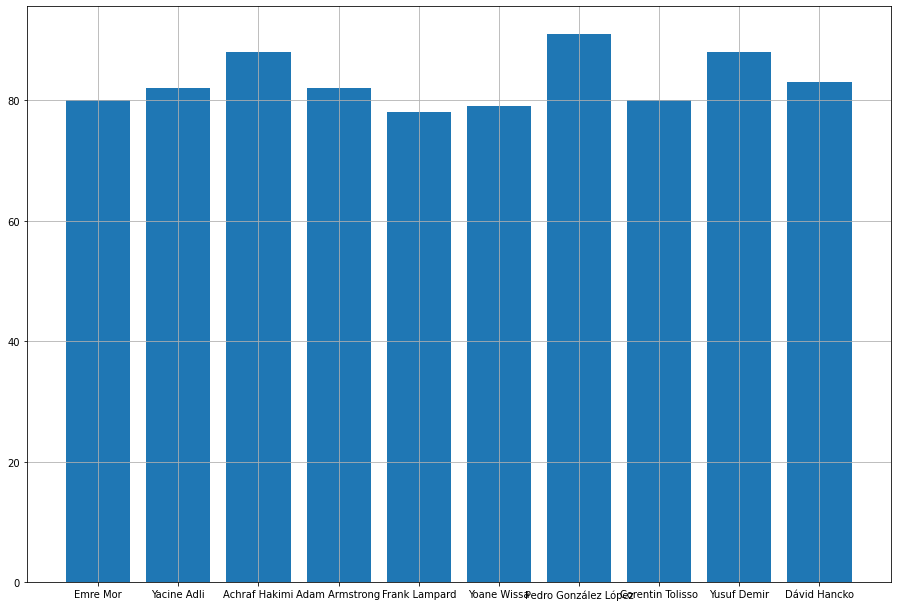

In [156]:
fig = plt.figure()
plt = fig.add_axes([1,1,2,2])

x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)
plt.bar(x,y)
plt.grid()

5. Plot a graph - Player's Name V/s Player's Wage

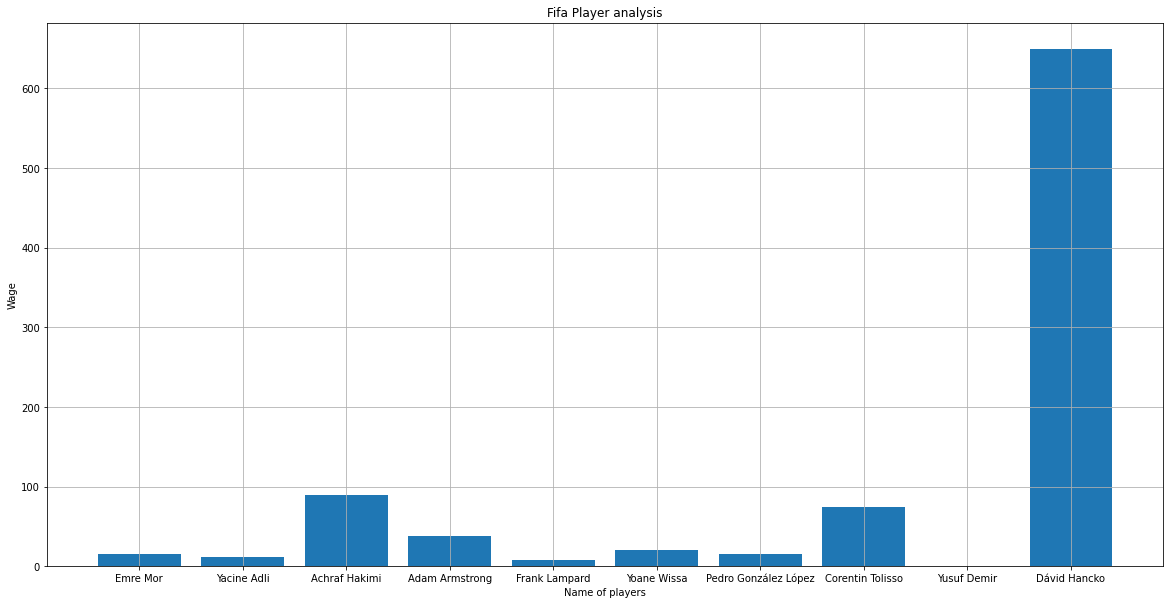

In [159]:
import matplotlib.pyplot as plt


xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()

6. Find the player who has scored highest number of goals.

In [160]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Emre Mor,22,73,80,RC Celta,6.0,16,1759,3.7
1,Yacine Adli,19,72,82,FC Girondins de Bordeaux,5.0,12,1918,3.0
2,Achraf Hakimi,21,83,88,Inter,56.0,90,2150,2.9
3,Adam Armstrong,23,75,82,Blackburn Rovers,11.5,38,1960,2.7
4,Frank Lampard,38,78,78,New York City FC,575.0,8,2022,2.1
...,...,...,...,...,...,...,...,...,...
395,Florian Wirtz,17,76,89,Bayer 04 Leverkusen,17.0,7,1897,677.0
419,Presnel Kimpembe,24,83,87,Paris Saint-Germain,47.0,82,1909,529.0
479,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011,527.0
539,Frenkie de Jong,23,86,91,FC Barcelona,102.0,210,2203,522.0


In [161]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

21    Georginio Wijnaldum
Name: Name, dtype: object

In [162]:
print(fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name'],fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Hits'])

21    Georginio Wijnaldum
Name: Name, dtype: object 21    993.0
Name: Hits, dtype: float64


In [164]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

21    Georginio Wijnaldum
Name: Name, dtype: object

7. Find all the players whose Potential is more than equal to 90

In [167]:
fifa_600[fifa_600['POT']>=90]['Name']

6              Pedro González López
10                    Kylian Mbappé
11       Neymar da Silva Santos Jr.
15                   Matvey Safonov
22                   Erling Haaland
23     C. Ronaldo dos Santos Aveiro
27                   Anssumane Fati
43             Gianluigi Donnarumma
46               Marcos Aoás Corrêa
119                 Dayot Upamecano
299                      Phil Foden
479                    Jadon Sancho
539                 Frenkie de Jong
Name: Name, dtype: object

8. Find all the players whose Potential is more than 90 and the age < 20

In [183]:
fifa_600[(fifa_600['POT']>90) & (fifa_600['Age']<20) ]['Name']

6     Pedro González López
22          Erling Haaland
Name: Name, dtype: object

7. Find all the players whose values >10 but wage <50

In [185]:
fifa_600[(fifa_600['Value']>10) & (fifa_600['Wage']<50)]['Name']

3                Adam Armstrong
4                 Frank Lampard
6          Pedro González López
19                Denis Zakaria
25            Eduardo Camavinga
27               Anssumane Fati
29               Dušan Vlahović
36             Ryan Gravenberch
37              Denzel Dumfries
41                Florian Wirtz
42              Alphonso Davies
43         Gianluigi Donnarumma
45                    Ben White
54              Ibrahima Konaté
55     Alex Teixeira dos Santos
58              Mason Greenwood
59                  Bukayo Saka
119             Dayot Upamecano
179             Jude Bellingham
359             Boubacar Kamara
395               Florian Wirtz
Name: Name, dtype: object

Conclusion: 

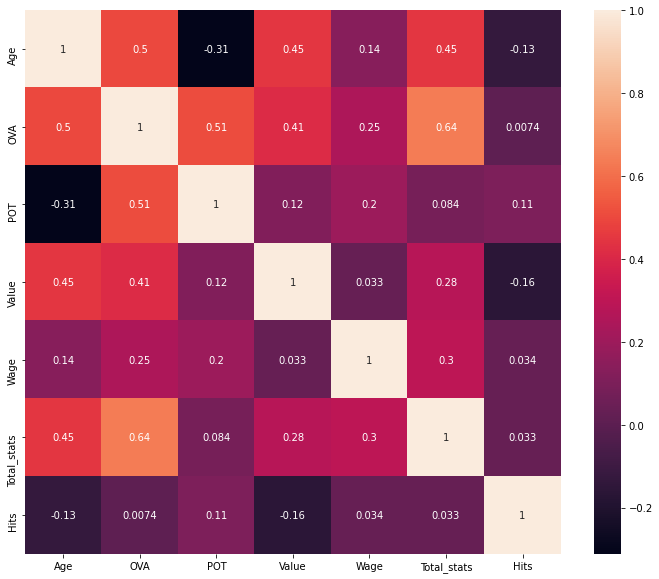

In [192]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_600.corr(), annot=True)

In [189]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats,Hits
Age,1.000000,0.499734,-0.311758,0.450308,0.135533,0.449431,-0.129388
OVA,0.499734,1.000000,0.509916,0.414446,0.249025,0.641028,0.007350
POT,-0.311758,0.509916,1.000000,0.117480,0.195815,0.083738,0.107927
Value,0.450308,0.414446,0.117480,1.000000,0.032925,0.281234,-0.161824
Wage,0.135533,0.249025,0.195815,0.032925,1.000000,0.302195,0.033786
Total_stats,0.449431,0.641028,0.083738,0.281234,0.302195,1.000000,0.032522
Hits,-0.129388,0.007350,0.107927,-0.161824,0.033786,0.032522,1.000000
